In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Import the dataset
path = "merged_df.csv"
house_price = pd.read_table(path, sep=',')
house_price.head()

,Land Square Feet,Apartments,Rooms,Bedrooms,Fireplaces,Half Baths,Garage 2 Size,Building Square Feet,Multi Code,Number of Commercial Units,...,Flood_1.0,Road_0.0,Road_1.0,Qtr_1,Qtr_2,Qtr_3,Qtr_4,Mkt_0,Mkt_1,CERTIFIED
0,4500.0,6.0,12.5,5.5,0.0,0.0,0.0,3823.0,1.0,0.0,...,0,1,0,0,0,0,1,0,1,251186.0
1,13882.5,0.0,11.0,4.0,2.0,1.0,0.0,3823.0,1.0,0.0,...,0,0,1,0,0,1,0,0,1,1281194.0
2,3720.0,0.0,9.0,5.0,2.0,3.0,0.0,3823.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,2378838.0
3,3720.0,2.0,12.0,5.5,2.0,2.0,0.0,3094.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,2378838.0
4,13882.5,0.0,7.0,3.0,1.0,1.0,0.0,2208.0,1.0,0.0,...,0,1,0,0,1,0,0,0,1,312758.0


In [3]:
house_price.head()

,Land Square Feet,Apartments,Rooms,Bedrooms,Fireplaces,Half Baths,Garage 2 Size,Building Square Feet,Multi Code,Number of Commercial Units,...,Flood_1.0,Road_0.0,Road_1.0,Qtr_1,Qtr_2,Qtr_3,Qtr_4,Mkt_0,Mkt_1,CERTIFIED
0,4500.0,6.0,12.5,5.5,0.0,0.0,0.0,3823.0,1.0,0.0,...,0,1,0,0,0,0,1,0,1,251186.0
1,13882.5,0.0,11.0,4.0,2.0,1.0,0.0,3823.0,1.0,0.0,...,0,0,1,0,0,1,0,0,1,1281194.0
2,3720.0,0.0,9.0,5.0,2.0,3.0,0.0,3823.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,2378838.0
3,3720.0,2.0,12.0,5.5,2.0,2.0,0.0,3094.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,2378838.0
4,13882.5,0.0,7.0,3.0,1.0,1.0,0.0,2208.0,1.0,0.0,...,0,1,0,0,1,0,0,0,1,312758.0


# Correlation

In [4]:
# test the correlation
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
house_price_X = house_price.drop("CERTIFIED", axis = 1)

In [5]:
y = house_price["CERTIFIED"]

In [6]:
# calculate the correlation between FEATURES
corr_matrix = house_price.corr()
print(corr_matrix)

                  Land Square Feet  Apartments     Rooms  Bedrooms  \
Land Square Feet          1.000000   -0.222485  0.055495  0.106553   
Apartments               -0.222485    1.000000  0.656923  0.572255   
Rooms                     0.055495    0.656923  1.000000  0.858678   
Bedrooms                  0.106553    0.572255  0.858678  1.000000   
Fireplaces                0.371372   -0.159763  0.185842  0.175021   
...                            ...         ...       ...       ...   
Qtr_3                     0.024740   -0.021940 -0.001492 -0.000707   
Qtr_4                    -0.004108    0.011683 -0.000800 -0.002032   
Mkt_0                    -0.109120    0.093658  0.051262  0.049247   
Mkt_1                     0.109120   -0.093658 -0.051262 -0.049247   
CERTIFIED                 0.083956    0.057166  0.252195  0.221586   

                  Fireplaces  Half Baths  Garage 2 Size  Building Square Feet  \
Land Square Feet    0.371372    0.221464       0.021479              0.175900 

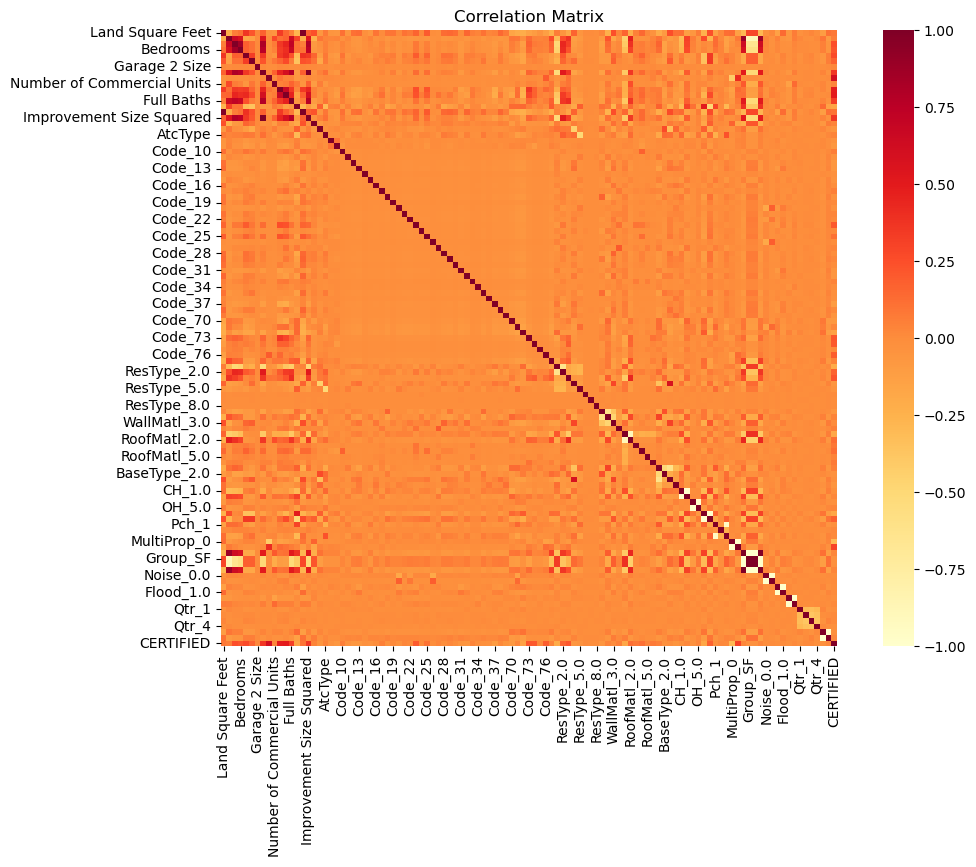

In [7]:
# draw the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='YlOrRd', square=True)
plt.title('Correlation Matrix')
plt.show()

Each feature is of low correlation, so we don't need to use Lasso/Ridge. We choose to use the linear regression.

In [8]:
# Calculate the correlation between FEATURES and house prices, listing the FEATURES with a correlation greater than 0.1 or smaller than -0.1
corr=house_price.corr()['CERTIFIED']
# corr[corr>0.1].sort_values()

corr[(corr > 0.1) | (corr < -0.1)].sort_values()

MultiProp_0                -0.298608
ResType_1.0                -0.205484
RoofMatl_1.0               -0.178621
CtrlAir_0.0                -0.174495
Age                        -0.157285
Code_72                    -0.140999
Code_37                    -0.101392
Code_25                     0.102225
RoofMatl_4.0                0.111380
RoofMatl_2.0                0.117778
ResType_2.0                 0.168532
Half Baths                  0.170924
CtrlAir_1.0                 0.174495
Code_76                     0.188894
Code_74                     0.204202
Code_23                     0.210277
Code_73                     0.214244
Bedrooms                    0.221586
ResType_3.0                 0.223258
Rooms                       0.252195
Fireplaces                  0.271056
MultiProp_1                 0.298608
Full Baths                  0.325671
Improvement Size Squared    0.358931
Building Square Feet        0.364215
Estimate (Land)             0.490214
Estimate (Building)         0.498479
M

# Linear Regression

## 1. Use the most important variables.

In [9]:
# split the train and test set
X = house_price[['Multi Code', 'Estimate (Building)', 'Estimate (Land)', 'Building Square Feet', 
                 'Improvement Size Squared', 'Full Baths', 'MultiProp_1', 'Fireplaces', 'ResType_3.0', 'Code_73', 
                 'Code_23', 'Code_74', 'Rooms', 'Code_76', 'Bedrooms', 'CtrlAir_1.0', 'Half Baths', 'ResType_2.0',
                 'RoofMatl_2.0', 'RoofMatl_4.0', 'Code_25', 'MultiProp_0','ResType_1.0','RoofMatl_1.0','CtrlAir_0.0',
                 'Age','Code_72','Code_37'
                ]]
y = house_price.CERTIFIED

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Use linear regression models to train the data and predict the test set data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
coef = linear_model.coef_#回归系数
line_pre = linear_model.predict(X_test)
print('SCORE:{:.4f}'.format(linear_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))
coef

SCORE:0.7066
RMSE:231429.7459


array([ 5.08956375e+05,  7.75637320e-01,  2.11727334e+00,  7.65451287e+01,
       -8.66800763e-03,  3.26664760e+04,  1.26219157e+04,  2.64463191e+04,
        9.56151428e+03,  2.34050898e+05,  3.38251974e+05,  6.61069739e+05,
       -5.12682440e+03,  1.92392704e+05, -6.99537178e+03,  7.46149367e+01,
        1.43963720e+04, -9.96106607e+03, -1.54870422e+05,  1.13749776e+04,
        4.44643881e+04, -1.26219163e+04,  1.30575303e+04, -1.33258167e+05,
       -7.46149946e+01, -2.33234161e+04,  7.32884744e+03, -9.14021277e+03])

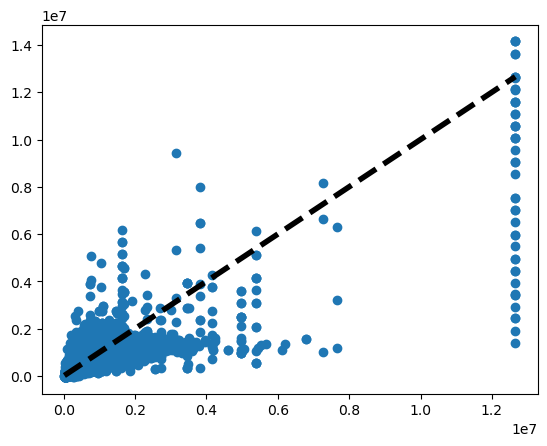

In [12]:
# evaluate the accuracy of the model
plt.scatter(y_test, line_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

SCORE:0.6502
RMSE:249713.5662


<Axes: >

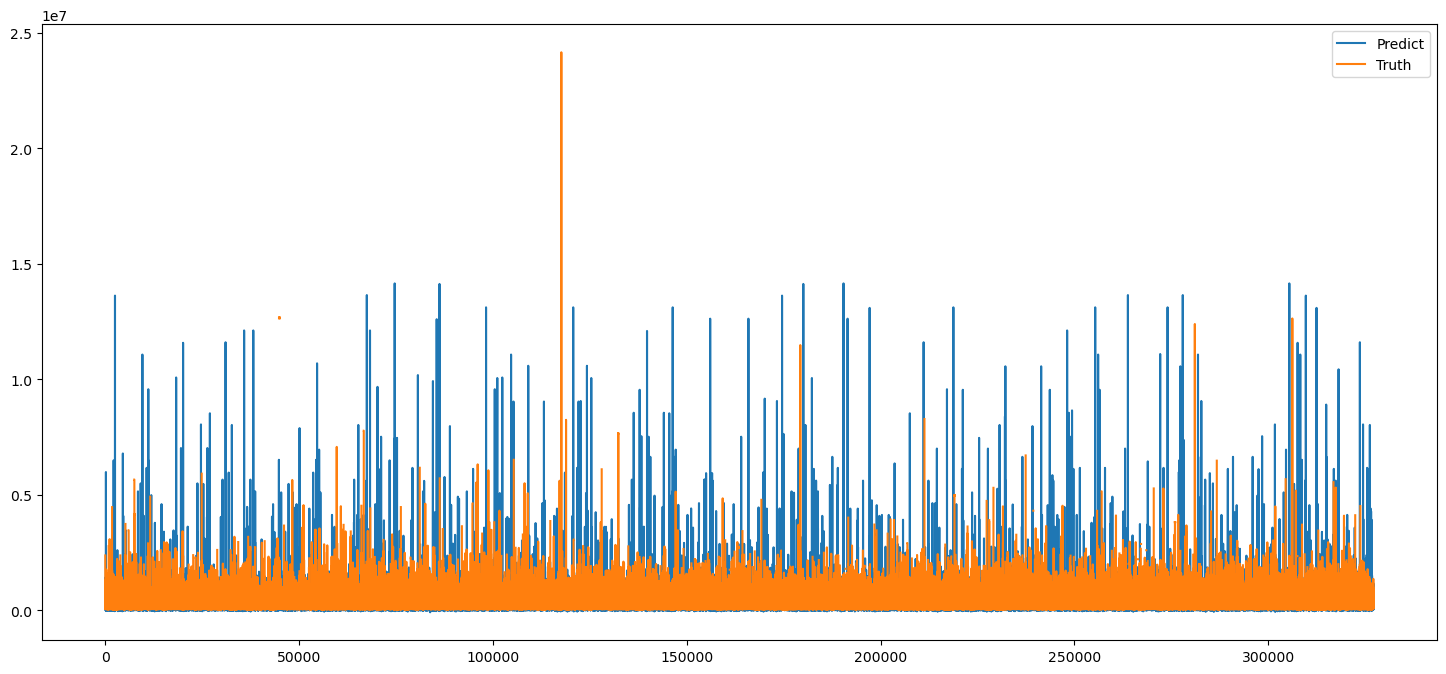

In [13]:
# test whether there is overfitting
# use the model on the train data and calculate its score
line_pre_all = linear_model.predict(X_train)
print('SCORE:{:.4f}'.format(linear_model.score(X_train,y_train)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_train, line_pre_all))))
hos_pre_all = pd.DataFrame()
hos_pre_all['Predict'] = line_pre_all
hos_pre_all['Truth'] = y_train
hos_pre_all.plot(figsize=(18,8))

The scores on the train data and on the test data are similar. So there's no overfitting.

# 2. Use PCA. 

In [14]:
# split the train and test set
X = house_price.drop('CERTIFIED', axis=1)
y = house_price.CERTIFIED
scale = StandardScaler()
normal_X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, test_size = 0.2, random_state = 42)

In [15]:
# PCA
pca = PCA(n_components = 108)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
pca.explained_variance_

array([9.90396405e+00, 6.17527814e+00, 3.05982406e+00, 2.68464572e+00,
       2.45216924e+00, 2.20513174e+00, 2.20012999e+00, 2.17796537e+00,
       2.01482479e+00, 1.97706468e+00, 1.94595266e+00, 1.81523983e+00,
       1.67237278e+00, 1.51148645e+00, 1.44307009e+00, 1.39169153e+00,
       1.37367474e+00, 1.33071571e+00, 1.30296595e+00, 1.27396719e+00,
       1.26156479e+00, 1.25117309e+00, 1.25062189e+00, 1.21324865e+00,
       1.17344779e+00, 1.15258268e+00, 1.13295328e+00, 1.12344431e+00,
       1.10193369e+00, 1.08963786e+00, 1.06948348e+00, 1.05698712e+00,
       1.04874927e+00, 1.04472221e+00, 1.04051358e+00, 1.03629426e+00,
       1.03461232e+00, 1.02928203e+00, 1.02909413e+00, 1.02838739e+00,
       1.02450042e+00, 1.02395453e+00, 1.02252246e+00, 1.01994104e+00,
       1.01760558e+00, 1.01706270e+00, 1.01468810e+00, 1.01376687e+00,
       1.01288839e+00, 1.00901307e+00, 1.00682778e+00, 9.98548543e-01,
       9.97510404e-01, 9.86415285e-01, 9.85366601e-01, 9.75621943e-01,
      

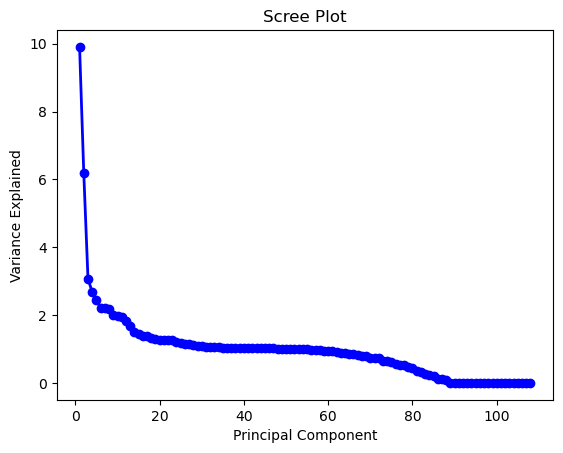

In [17]:
#scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
# select n = 20
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
# Use linear regression models to train the data and predict the test set data
linear_model1 = LinearRegression()
linear_model1.fit(X_train_pca, y_train)
line_pre1 = linear_model1.predict(X_test_pca)
print('SCORE:{:.4f}'.format(linear_model1.score(X_test_pca, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre1))))

SCORE:0.4819
RMSE:307556.2263


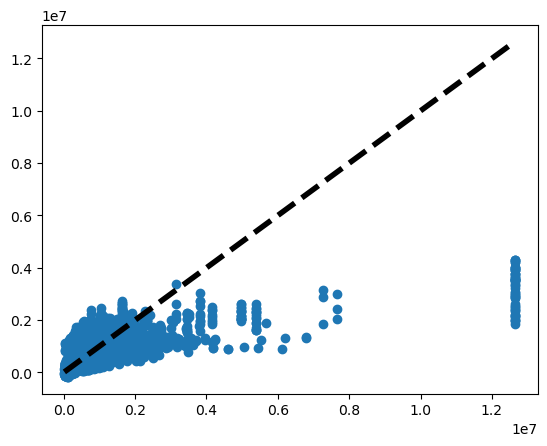

In [20]:
# evaluate the accuracy of the model
plt.scatter(y_test, line_pre1,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

We use PCA to lower the data dimention to 20. Finally the score of the regression is 0.46. However in the previous "regression with important variables", the score is 0.63, higher than it, and the data dimension is 21. So it seems better to use "reserve important variables" to lower dimension. We choose to not use PCA.

# XGBoost

In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [22]:
# split the train and test set
X = house_price[['Multi Code', 'Estimate (Building)', 'Estimate (Land)', 'Building Square Feet', 
                 'Improvement Size Squared', 'Full Baths', 'MultiProp_1', 'Fireplaces', 'ResType_3.0', 'Code_73', 
                 'Code_23', 'Code_74', 'Rooms', 'Code_76', 'Bedrooms', 'CtrlAir_1.0', 'Half Baths', 'ResType_2.0',
                 'RoofMatl_2.0', 'RoofMatl_4.0', 'Code_25','MultiProp_0','ResType_1.0','RoofMatl_1.0','CtrlAir_0.0',
                 'Age','Code_72','Code_37'
                ]]
y = house_price.CERTIFIED

In [23]:
# hyperparameter tune
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

model = XGBRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 9}
Best Score:  0.9382161322880703


In [24]:
# XGBOOST
clf1 = XGBRegressor(max_depth=9, learning_rate=0.2)
clf1.fit(X_train, y_train)
clf1_pre=clf1.predict(X_test) 
print('SCORE:{:.4f}'.format(clf1.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, clf1_pre))))

SCORE:0.9553
RMSE:90346.0273


In [25]:
mae = mean_absolute_error(y_test, clf1_pre)
print('MAE:{:.4f}'.format(mae))

MAE:32634.2762


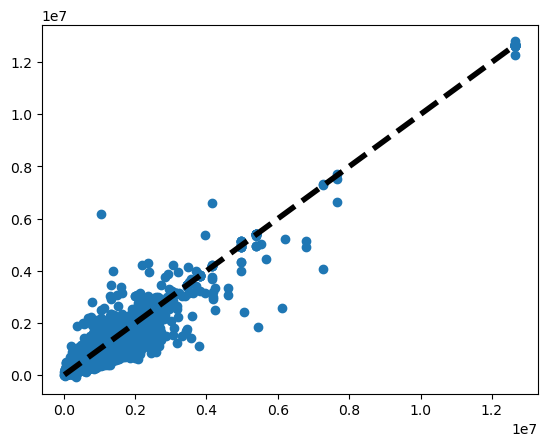

In [26]:
# evaluate the accuracy of the model
plt.scatter(y_test, clf1_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

SCORE:0.9779
RMSE:62716.8402


<Axes: >

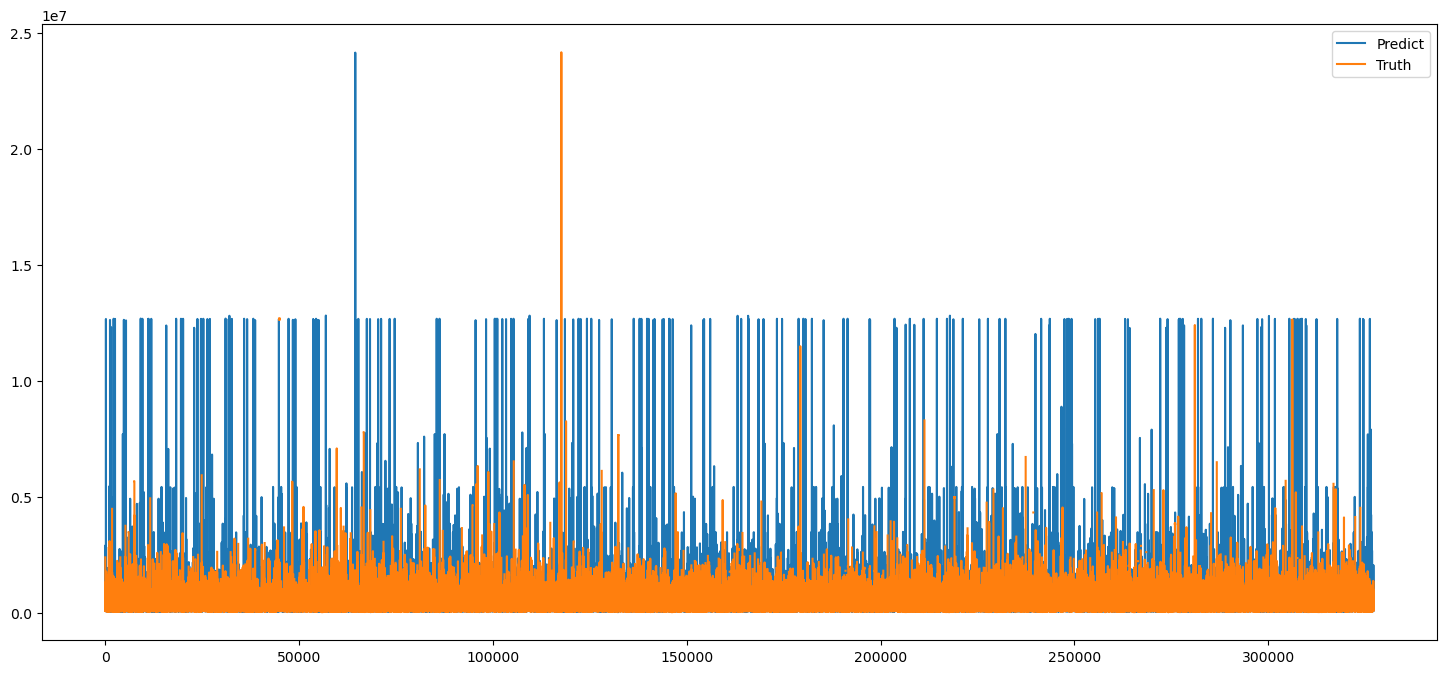

In [27]:
# test whether there is overfitting
# use the model on the train data and calculate its score
clf_pre_all = clf1.predict(X_train)
print('SCORE:{:.4f}'.format(clf1.score(X_train,y_train)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_train, clf_pre_all))))
hos_pre_all = pd.DataFrame()
hos_pre_all['Predict'] = clf_pre_all
hos_pre_all['Truth'] = y_train
hos_pre_all.plot(figsize=(18,8))

The scores on the train data and on the test data are similar. So there's no overfitting.